# ELM368 Dersi - PROJE Çalışması
## Grup C11

#### Kütüphaneler vb.

In [1]:
import numpy as np                      
# mat. fonksiyonlarını kullanabilmek için gereken kütüphane

from matplotlib import pyplot as plt    
# plot (grafik çizdirme) fonksiyonlarını kullanmakak için gereken kütüphane

from scipy import signal as sgnl    # temel sinyal işleme kütüphanesi
from scipy.fftpack import fft, ifft # fft ve ifft kütüphaneleri

%matplotlib notebook
#düzgün grafik görüntülemek için gerekiyor

from scipy.io.wavfile import read     # Ses dosyasının okunması için gerekli kütüphane
from IPython.lib.display import Audio # Ses dosyasının dinlenmesi için gerekli kütüphane
from scipy.io import wavfile          # wav dosyası okutmak için kütüphane
from scipy.io import loadmat          # pyfdadan filtre okutmak için kütüphane

from numpy import pi as pi # pi sayısını direkt pi olarak kullanmak için

import warnings
warnings.simplefilter("ignore", np.ComplexWarning) 
warnings.simplefilter("ignore", wavfile.WavFileWarning)
# işlem sonucunu etkilemeyen hataları almamak için


C11_catmeow_1.wav bilgisi:  (486202, 2) Fs değeri:  44100
C11_catmeow_2.wav bilgisi:  (465280, 2) Fs değeri:  44100
C11_catmeow_3.wav bilgisi:  (500697, 2) Fs değeri:  44100


<IPython.core.display.Javascript object>


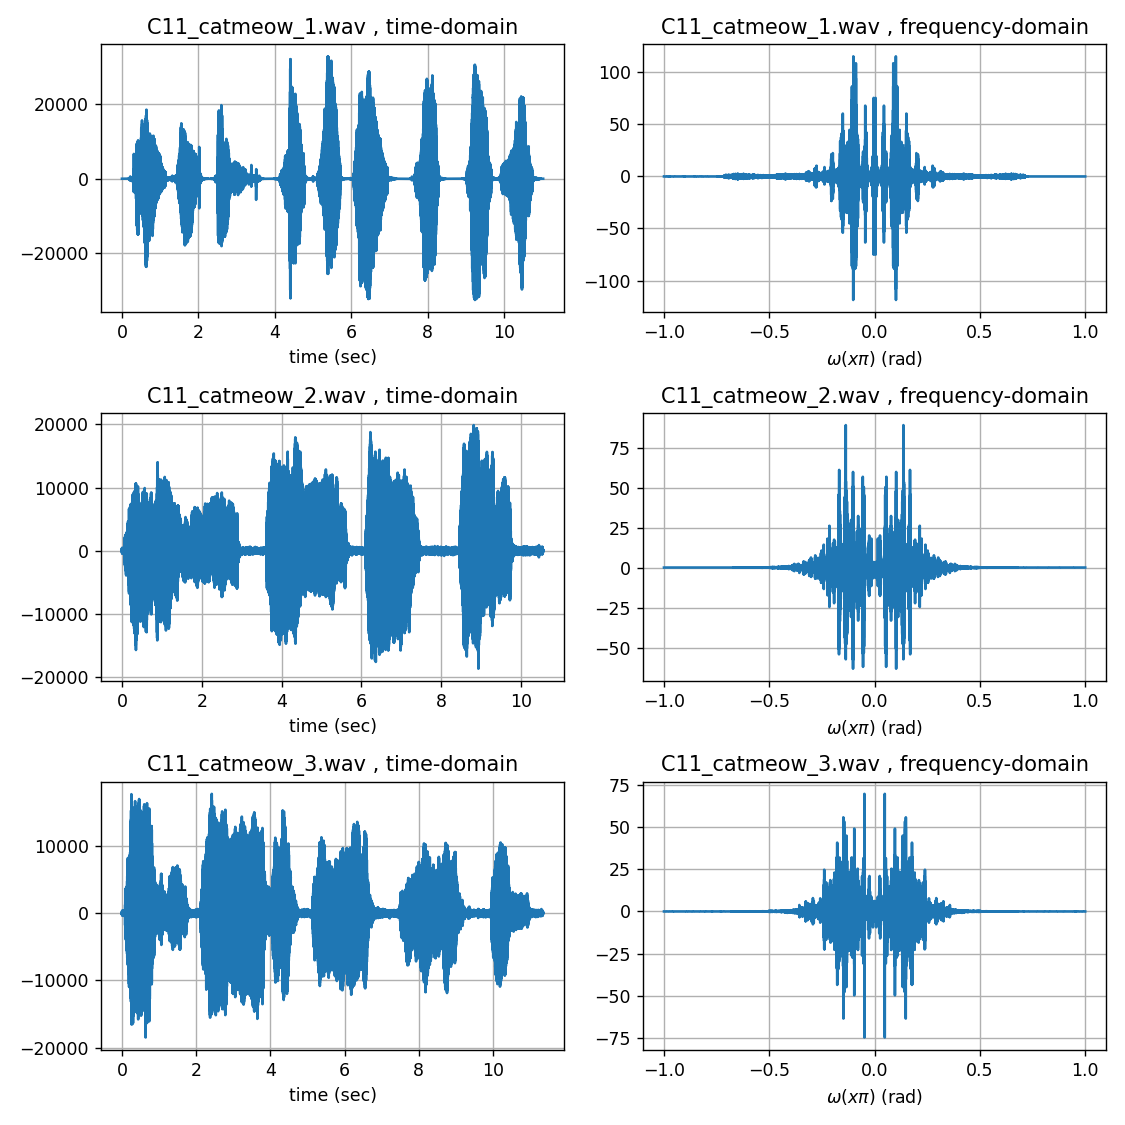

In [2]:
Fs1, cat1 = wavfile.read('C11_catmeow_1.wav')  # .wav uzantılı dosyadan data ve sample rate bilgilerinin edinilmesi
print("C11_catmeow_1.wav bilgisi: ",cat1.shape,"Fs değeri: ",Fs1) # cat1'in boyut ve Fs bilgisi
Fs2, cat2 = wavfile.read('C11_catmeow_2.wav')  # .wav uzantılı dosyadan data ve sample rate bilgilerinin edinilmesi
print("C11_catmeow_2.wav bilgisi: ",cat2.shape,"Fs değeri: ",Fs2) # cat2'nin boyut ve Fs bilgisi
Fs3, cat3 = wavfile.read('C11_catmeow_3.wav')  # .wav uzantılı dosyadan data ve sample rate bilgilerinin edinilmesi
print("C11_catmeow_3.wav bilgisi: ",cat3.shape,"Fs değeri: ",Fs3) # cat3'ün boyut ve Fs bilgisi

Fs = 44100  # tüm Fs' değerleri aynı olduğu için bu şekilde tanımladık
Ts = 1 / Fs # Ts tanımladık

# cat1.wav bilgileri.................................................................
cat_1_data = cat1[:,1] # elde edilen cat1 data'nın değişkene atanması
cat_1_length = len(cat_1_data) # N1 değeri
t_1 = np.arange(len(cat_1_data)) / float(Fs) # zaman domaini için zaman indisi
w_1 = np.linspace(-pi,pi,cat_1_length) # frekans domaini için omega
cat_1_freq = np.fft.fftshift(np.fft.fft(cat_1_data, cat_1_length) / cat_1_length) # frekans domainine geçme
# cat2.wav bilgileri.................................................................
cat_2_data = cat2[:,1] # elde edilen cat2 data'nın değişkene atanması
cat_2_length = len(cat_2_data) # N2 değeri
t_2 = np.arange(len(cat_2_data)) / float(Fs) # zaman domaini için zaman indisi
w_2 = np.linspace(-pi,pi,cat_2_length) # frekans domaini için omega
cat_2_freq = np.fft.fftshift(np.fft.fft(cat_2_data, cat_2_length) / cat_2_length) # frekans domainine geçme
# cat3.wav bilgileri.................................................................
cat_3_data = cat3[:,1] # elde edilen cat3 data'nın değişkene atanması
cat_3_length = len(cat_3_data) # N3 değeri
t_3 = np.arange(len(cat_3_data)) / float(Fs) # zaman domaini için zaman indisi
w_3 = np.linspace(-pi,pi,cat_3_length) # frekans domaini için omega
cat_3_freq = np.fft.fftshift(np.fft.fft(cat_3_data, cat_3_length) / cat_3_length) # frekans domainine geçme

# grafikler..........................................................................
plt.figure(1,figsize=(9,9)) # grafik boyutlarının ayarlanması
#cat1
plt.subplot(3,2,1)
plt.plot(t_1,cat_1_data)
plt.title("C11_catmeow_1.wav , time-domain")
plt.xlabel("time (sec)")
plt.grid()

plt.subplot(3,2,2)
plt.plot(w_1/pi,cat_1_freq)
plt.title("C11_catmeow_1.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.grid()

#cat2
plt.subplot(3,2,3)
plt.plot(t_2,cat_2_data)
plt.title("C11_catmeow_2.wav , time-domain")
plt.xlabel("time (sec)")
plt.grid()

plt.subplot(3,2,4)
plt.plot(w_2/pi,cat_2_freq)
plt.title("C11_catmeow_2.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.grid()

#cat3
plt.subplot(3,2,5)
plt.plot(t_3,cat_3_data)
plt.title("C11_catmeow_3.wav , time-domain")
plt.xlabel("time (sec)")
plt.grid()

plt.subplot(3,2,6)
plt.plot(w_3/pi,cat_3_freq)
plt.title("C11_catmeow_3.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.grid()

##
plt.show()
plt.tight_layout()

YORUM: Projede kullanacağımız kedi seslerinin, örnekleme frekanslarını, örnek sayılarını sonrasında da sesleri zaman ve frekans domaininde inceledik.

C11_babycry_1.wav bilgisi:  (629527, 2) Fs değeri:  44100
C11_babycry_2.wav bilgisi:  (749699, 2) Fs değeri:  44100
C11_babycry_3.wav bilgisi:  (749698, 2) Fs değeri:  44100


<IPython.core.display.Javascript object>


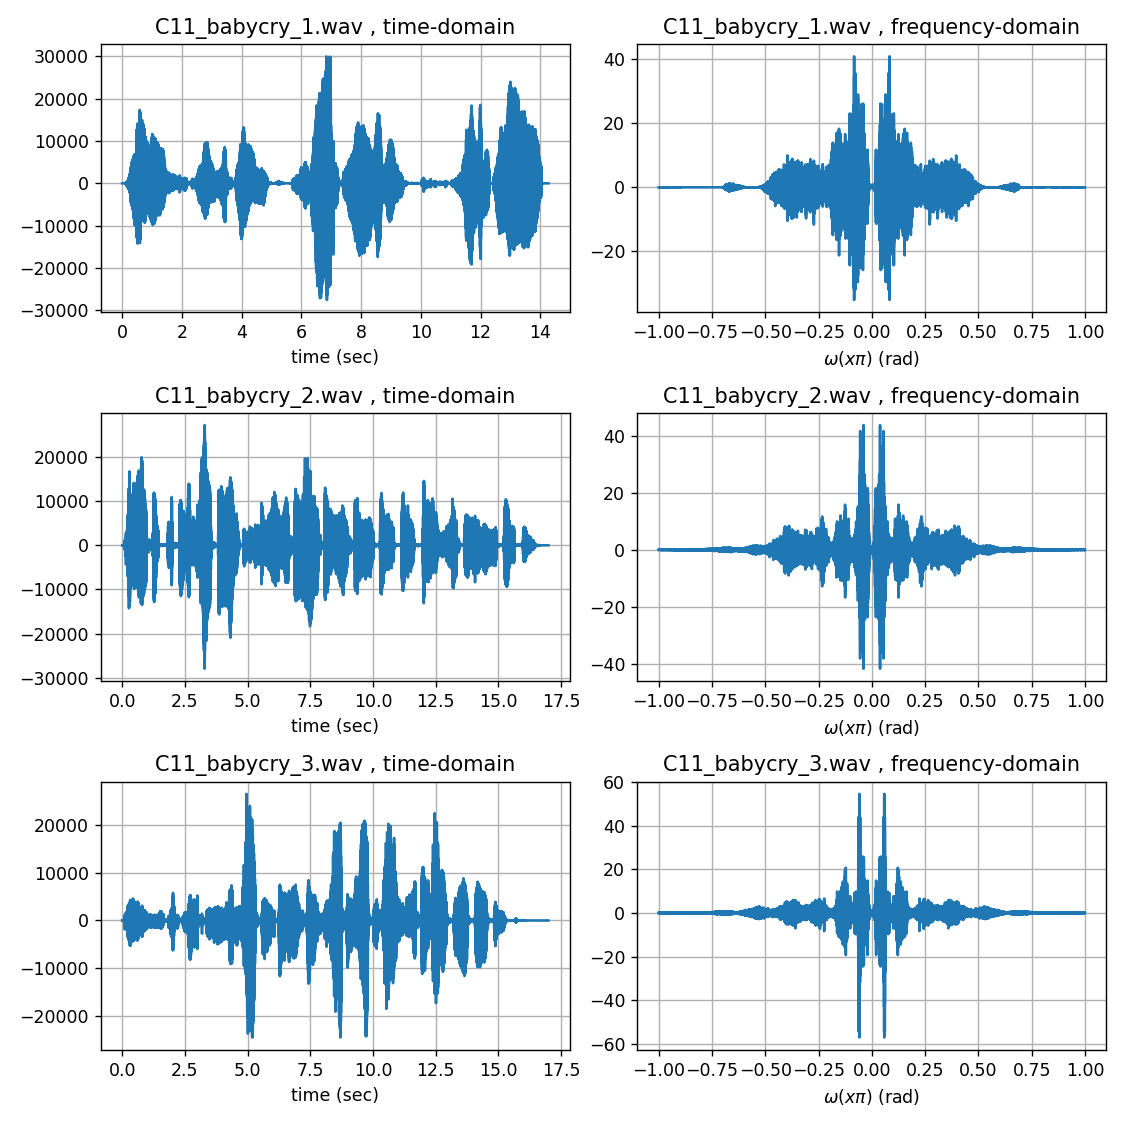

In [3]:
Fs4, cry1 = wavfile.read('C11_babycry_1.wav')  # .wav uzantılı dosyadan data ve sample rate bilgilerinin edinilmesi
print("C11_babycry_1.wav bilgisi: ",cry1.shape,"Fs değeri: ",Fs4) # cry1'in boyut ve Fs bilgisi
Fs5, cry2 = wavfile.read('C11_babycry_2.wav')  # .wav uzantılı dosyadan data ve sample rate bilgilerinin edinilmesi
print("C11_babycry_2.wav bilgisi: ",cry2.shape,"Fs değeri: ",Fs5) # cry2'nin boyut ve Fs bilgisi
Fs6, cry3 = wavfile.read('C11_babycry_3.wav')  # .wav uzantılı dosyadan data ve sample rate bilgilerinin edinilmesi
print("C11_babycry_3.wav bilgisi: ",cry3.shape,"Fs değeri: ",Fs6) # cry3'ün boyut ve Fs bilgisi

Fs = 44100  # tüm Fs' değerleri aynı olduğu için bu şekilde tanımladık
Ts = 1 / Fs # Ts tanımladık

# cry1.wav bilgileri.................................................................
cry_1_data = cry1[:,1] # elde edilen cry1 data'nın değişkene atanması
cry_1_length = len(cry_1_data) # N1 değeri
t_4 = np.arange(len(cry_1_data)) / float(Fs) # zaman domaini için zaman indisi
w_4 = np.linspace(-pi,pi,cry_1_length) # frekans domaini için omega
cry_1_freq = np.fft.fftshift(np.fft.fft(cry_1_data, cry_1_length) / cry_1_length) # frekans domainine geçme
# cry2.wav bilgileri.................................................................
cry_2_data = cry2[:,1] # elde edilen cry2 data'nın değişkene atanması
cry_2_length = len(cry_2_data) # N2 değeri
t_5 = np.arange(len(cry_2_data)) / float(Fs) # zaman domaini için zaman indisi
w_5 = np.linspace(-pi,pi,cry_2_length) # frekans domaini için omega
cry_2_freq = np.fft.fftshift(np.fft.fft(cry_2_data, cry_2_length) / cry_2_length) # frekans domainine geçme
# cry3.wav bilgileri.................................................................
cry_3_data = cry3[:,1] # elde edilen cry3 data'nın değişkene atanması
cry_3_length = len(cry_3_data) # N3 değeri
t_6 = np.arange(len(cry_3_data)) / float(Fs) # zaman domaini için zaman indisi
w_6 = np.linspace(-pi,pi,cry_3_length) # frekans domaini için omega
cry_3_freq = np.fft.fftshift(np.fft.fft(cry_3_data, cry_3_length) / cry_3_length) # frekans domainine geçme

# grafikler..........................................................................
plt.figure(2,figsize=(9,9)) # grafik boyutlarının ayarlanması
#cry1
plt.subplot(3,2,1)
plt.plot(t_4,cry_1_data)
plt.title("C11_babycry_1.wav , time-domain")
plt.xlabel("time (sec)")
plt.grid()

plt.subplot(3,2,2)
plt.plot(w_4/pi,cry_1_freq)
plt.title("C11_babycry_1.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.grid()

#cry2
plt.subplot(3,2,3)
plt.plot(t_5,cry_2_data)
plt.title("C11_babycry_2.wav , time-domain")
plt.xlabel("time (sec)")
plt.grid()

plt.subplot(3,2,4)
plt.plot(w_5/pi,cry_2_freq)
plt.title("C11_babycry_2.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.grid()

#cry3
plt.subplot(3,2,5)
plt.plot(t_6,cry_3_data)
plt.title("C11_babycry_3.wav , time-domain")
plt.xlabel("time (sec)")
plt.grid()

plt.subplot(3,2,6)
plt.plot(w_6/pi,cry_3_freq)
plt.title("C11_babycry_3.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.grid()

##
plt.show()
plt.tight_layout()

YORUM: Projede kullanacağımız bebek ağlama seslerinin, örnekleme frekanslarını, örnek sayılarını sonrasında da sesleri zaman ve frekans domaininde inceledik.

<IPython.core.display.Javascript object>


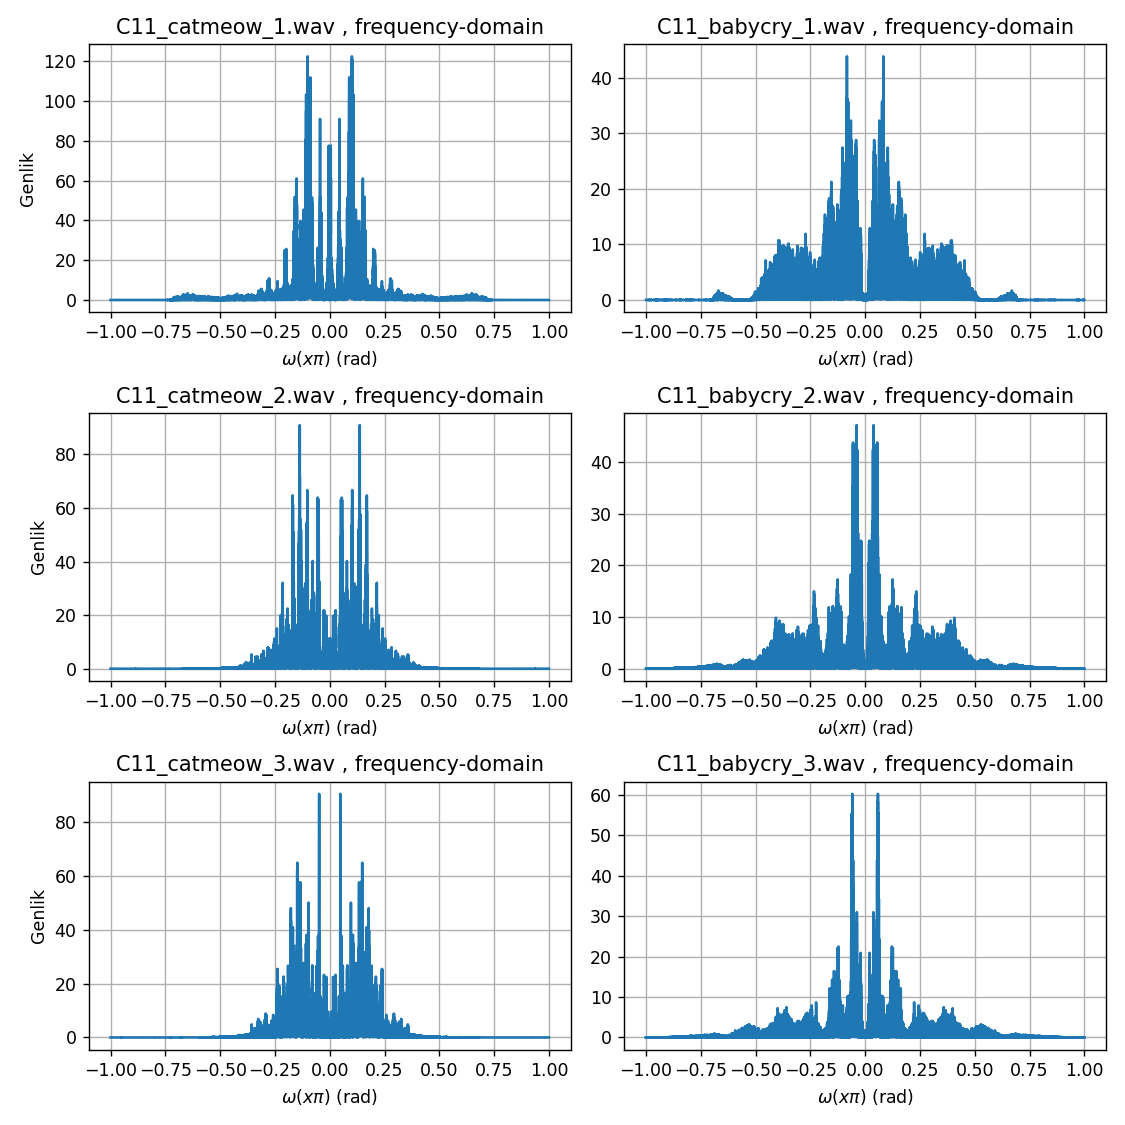

In [4]:
# kedi miyavlaması ve bebek ağlaması seslerinin frekans-domainindeki grafikleri .........................

plt.figure(3,figsize=(9,9)) # grafik boyutlarının ayarlanması

#cat1
plt.subplot(3,2,1)
plt.plot(w_1/pi,abs(cat_1_freq))
plt.title("C11_catmeow_1.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.ylabel("Genlik")
plt.grid()

#cry1
plt.subplot(3,2,2)
plt.plot(w_4/pi,abs(cry_1_freq))
plt.title("C11_babycry_1.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.grid()

#cat2
plt.subplot(3,2,3)
plt.plot(w_2/pi,abs(cat_2_freq))
plt.title("C11_catmeow_2.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.ylabel("Genlik")
plt.grid()

#cry2
plt.subplot(3,2,4)
plt.plot(w_5/pi,abs(cry_2_freq))
plt.title("C11_babycry_2.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.grid()

#cat3
plt.subplot(3,2,5)
plt.plot(w_3/pi,abs(cat_3_freq))
plt.title("C11_catmeow_3.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.ylabel("Genlik")
plt.grid()

#cry3
plt.subplot(3,2,6)
plt.plot(w_6/pi,abs(cry_3_freq))
plt.title("C11_babycry_3.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.grid()

##
plt.show()
plt.tight_layout()

YORUM: Kedi miyavlaması ve bebek ağlaması seslerinin hangi frekans değerlerinde daha yoğun olduğunu rahat görmek için "genliklerini" frekans domaininde inceledik.
    

<IPython.core.display.Javascript object>


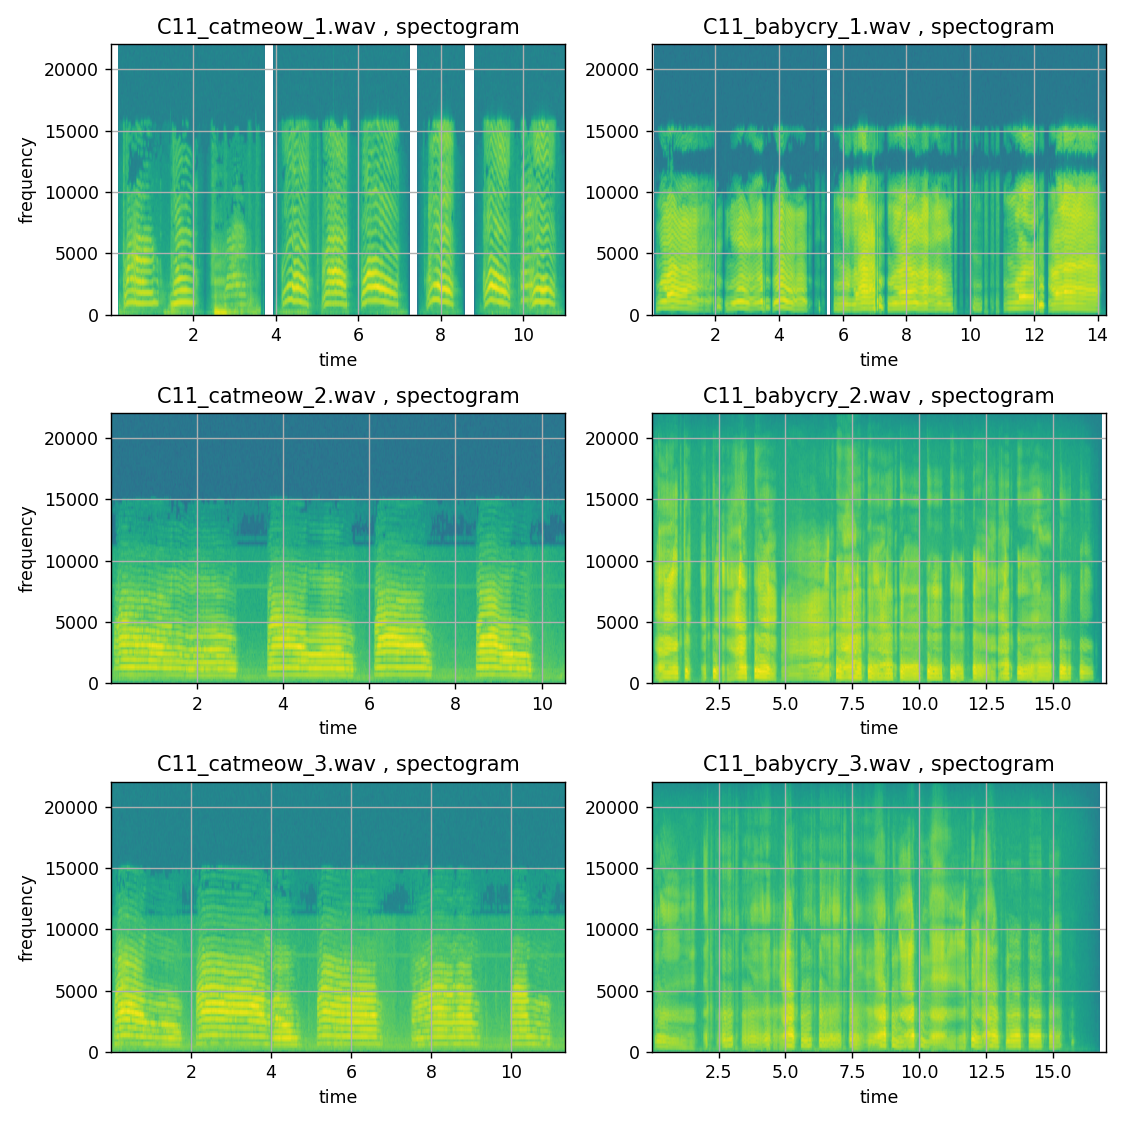

C:\Users\safa\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


In [5]:
# cat vs baby cry spectogram grafikleri............................................

plt.figure(4,figsize=(9,9)) # grafik boyutlarının ayarlanması

#cat1
plt.subplot(3,2,1)
plt.specgram(cat_1_data,Fs=Fs1)
plt.title("C11_catmeow_1.wav , spectogram")
plt.xlabel("time")
plt.ylabel("frequency")
plt.grid()

#cry1
plt.subplot(3,2,2)
plt.specgram(cry_1_data,Fs=Fs4)
plt.title("C11_babycry_1.wav , spectogram")
plt.xlabel("time")
plt.grid()

#cat2
plt.subplot(3,2,3)
plt.specgram(cat_2_data,Fs=Fs2)
plt.title("C11_catmeow_2.wav , spectogram")
plt.xlabel("time")
plt.ylabel("frequency")
plt.grid()

#cry2
plt.subplot(3,2,4)
plt.specgram(cry_2_data,Fs=Fs5)
plt.title("C11_babycry_2.wav , spectogram")
plt.xlabel("time")
plt.grid()

#cat3
plt.subplot(3,2,5)
plt.specgram(cat_3_data,Fs=Fs3)
plt.title("C11_catmeow_3.wav , spectogram")
plt.xlabel("time")
plt.ylabel("frequency")
plt.grid()

#cry3
plt.subplot(3,2,6)
plt.specgram(cry_3_data,Fs=Fs6)
plt.title("C11_babycry_3.wav , spectogram")
plt.xlabel("time")
plt.grid()

##
plt.show()
plt.tight_layout()


YORUM: Kullanacağımız ses işaretlerinin zaman içinde frekanslarının değişimini görmek ve enerjileri hakkında yorum yapabilmek için spektogramlarını çizdirdik.

In [12]:
#filtreden geçen sinyaller frekans domainine taşındı;
not_filtered_cat1_freq=np.fft.fft(cat_1_data)
not_filtered_cat2_freq=np.fft.fft(cat_2_data)
not_filtered_cat3_freq=np.fft.fft(cat_3_data)

not_filtered_cry1_freq=np.fft.fft(cry_1_data)
not_filtered_cry2_freq=np.fft.fft(cry_2_data)
not_filtered_cry3_freq=np.fft.fft(cry_3_data)

#frekans domainindeki filtrelenmiş işaretlerin enerjisi bulundu;
cat_1_energy1=sum(abs(not_filtered_cat1_freq)**2)
cat_2_energy1=sum(abs(not_filtered_cat2_freq)**2)
cat_3_energy1=sum(abs(not_filtered_cat3_freq)**2)

cry_1_energy1=sum(abs(not_filtered_cry1_freq)**2)
cry_2_energy1=sum(abs(not_filtered_cry2_freq)**2)
cry_3_energy1=sum(abs(not_filtered_cry3_freq)**2)

print("Sinyallerin Enerjileri; (Joule)")
print("cat_1_energy:",cat_1_energy1," cat_2_energy:",cat_2_energy1,"cat_3_energy:",cat_3_energy1)
print("cry_1_energy:",cry_1_energy1,"cry_2_energy:",cry_2_energy1," cry_3_energy:",cry_3_energy1)

Sinyallerin Enerjileri; (Joule)
cat_1_energy: 8.161150886035938e+18  cat_2_energy: 2.531093177627005e+18 cat_3_energy: 2.616997594635163e+18
cry_1_energy: 2.854851562052761e+18 cry_2_energy: 3.494435063121559e+18  cry_3_energy: 2.93242766220518e+18


YORUM: İşaretlerin enerjileri hesaplanılıp yazdırıldı, değerlerin çok yakın olduğunu görüyoruz; buradan sesleri ayrıştıramayacağımız barizdir. 

<IPython.core.display.Javascript object>


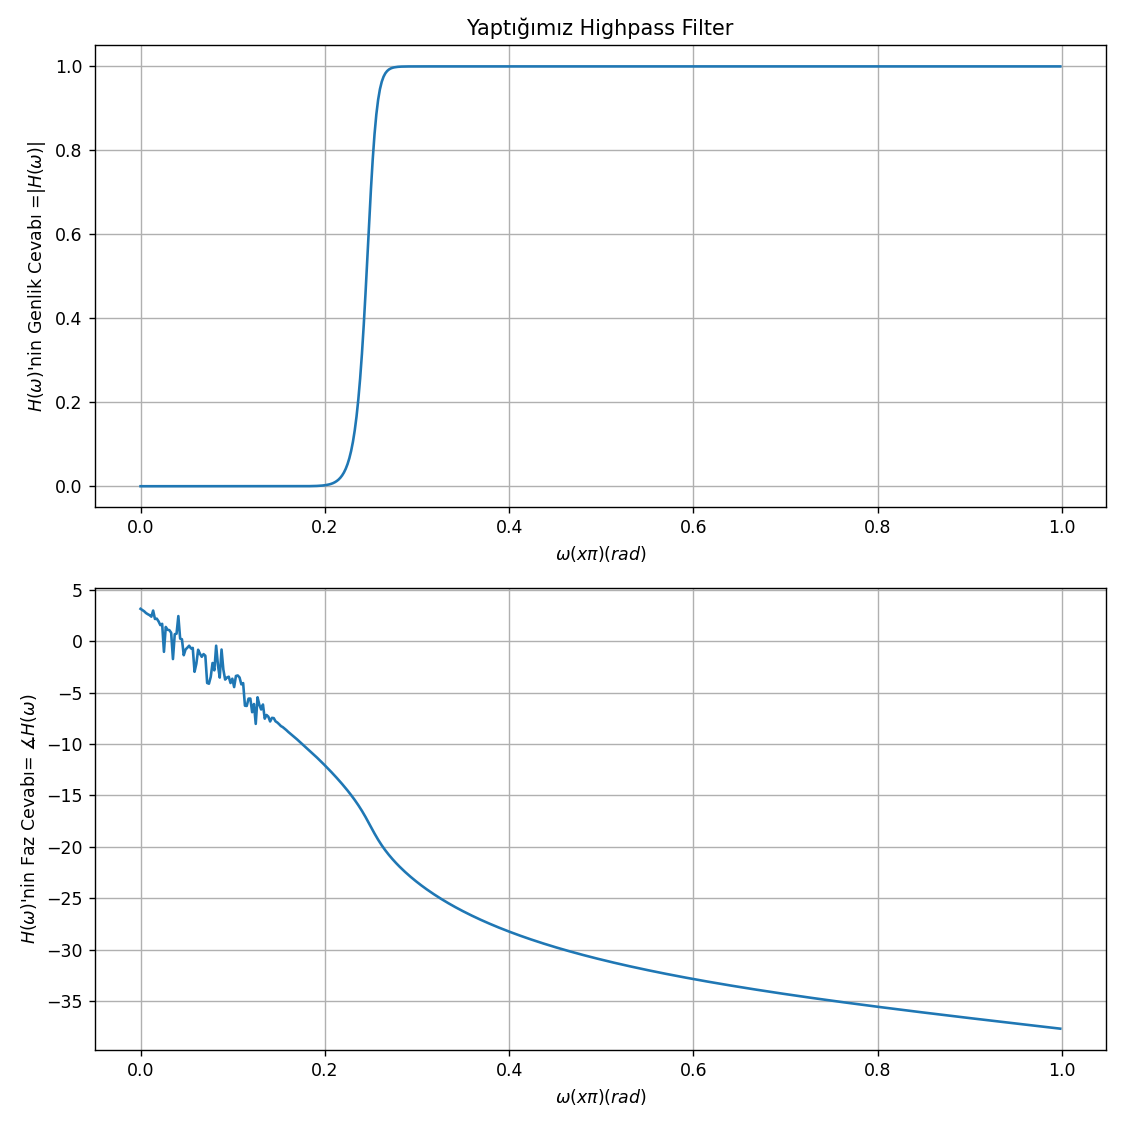

In [7]:
filter_data=loadmat("C11_IIR_HPF.mat")        # pyfda ile yaptığımız filtreyi yükleyelim
Coeffs=filter_data["ba"].astype(np.float) # b,a katsayılarını float olarak alalım

b=Coeffs[0,:]  #sıfırıncı sütun = b
a=Coeffs[1,:]  #birinci sütun = a 

#Filtreyi çizdirelim

Ww, Hw = sgnl.freqz(b,a)  

Hw_abs = np.abs(Hw)                 # filtrenin genlik cevabı
Hw_pha = np.unwrap(np.angle(Hw))    # filtrenin faz cevabı

plt.figure(5,figsize=(9,9))

plt.subplot(2,1,1)   # genlik cevabının çizdirilmesi
plt.plot(Ww/pi,Hw_abs)
plt.title("Yaptığımız Highpass Filter")
plt.xlabel("$\omega$$(x\pi) (rad)$")
plt.ylabel("$H$($\omega$)'nin Genlik Cevabı =|$H$($\omega$)|")
plt.grid()

plt.subplot(2,1,2)   # faz cevabının çizdirilmesi
plt.plot(Ww/pi,Hw_pha)
plt.xlabel("$\omega$$(x\pi) (rad)$")
plt.ylabel("$H$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H$($\omega$)")
plt.grid()

##
plt.show()
plt.tight_layout()

In [8]:
# sinyaller filtreden geçirildi;

filtered_cat1 = sgnl.lfilter(b,a,cat_1_data) # kedi sesleri
filtered_cat2 = sgnl.lfilter(b,a,cat_2_data)
filtered_cat3 = sgnl.lfilter(b,a,cat_3_data)

filtered_cry1 = sgnl.lfilter(b,a,cry_1_data) # bebek ağlaması sesleri
filtered_cry2 = sgnl.lfilter(b,a,cry_2_data)
filtered_cry3 = sgnl.lfilter(b,a,cry_3_data)

<IPython.core.display.Javascript object>


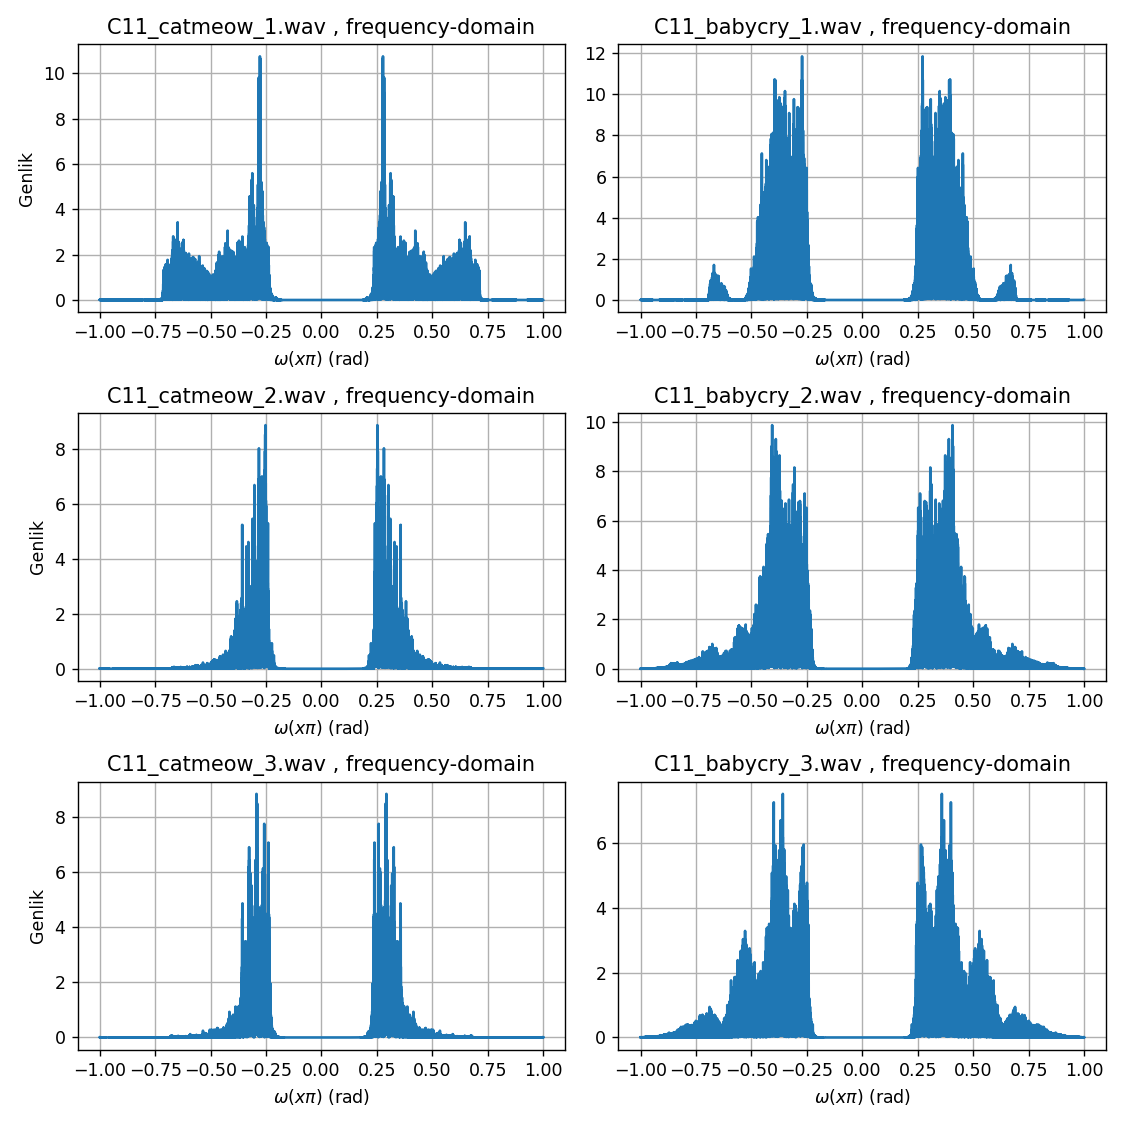

In [9]:
# kedi miyavlaması ve bebek ağlaması seslerinin 
# filtreden geçtikten sonrafrekans-domainindeki grafikleri

plt.figure(6,figsize=(9,9)) # grafik boyutlarının ayarlanması

#cat1
plt.subplot(3,2,1)
plt.plot(w_1/pi,abs(np.fft.fftshift(np.fft.fft(filtered_cat1, len(filtered_cat1)) / len(filtered_cat1))))
plt.title("C11_catmeow_1.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.ylabel("Genlik")
plt.grid()

#cry1
plt.subplot(3,2,2)
plt.plot(w_4/pi,abs(np.fft.fftshift(np.fft.fft(filtered_cry1, len(filtered_cry1)) / len(filtered_cry1))))
plt.title("C11_babycry_1.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.grid()

#cat2
plt.subplot(3,2,3)
plt.plot(w_2/pi,abs(np.fft.fftshift(np.fft.fft(filtered_cat2, len(filtered_cat2)) / len(filtered_cat2))))
plt.title("C11_catmeow_2.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.ylabel("Genlik")
plt.grid()

#cry2
plt.subplot(3,2,4)
plt.plot(w_5/pi,abs(np.fft.fftshift(np.fft.fft(filtered_cry2, len(filtered_cry2)) / len(filtered_cry2))))
plt.title("C11_babycry_2.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.grid()

#cat3S
plt.subplot(3,2,5)
plt.plot(w_3/pi,abs(np.fft.fftshift(np.fft.fft(filtered_cat3, len(filtered_cat3)) / len(filtered_cat3))))
plt.title("C11_catmeow_3.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.ylabel("Genlik")
plt.grid()

#cry3
plt.subplot(3,2,6)
plt.plot(w_6/pi,abs(np.fft.fftshift(np.fft.fft(filtered_cry3, len(filtered_cry3)) / len(filtered_cry3))))
plt.title("C11_babycry_3.wav , frequency-domain")
plt.xlabel("$\omega$$(x\pi)$ (rad)")
plt.grid()

##
plt.show()
plt.tight_layout()


In [11]:
#filtreden geçen sinyaller frekans domainine taşındı;
filtered_cat1_freq=np.fft.fft(filtered_cat1)
filtered_cat2_freq=np.fft.fft(filtered_cat2)
filtered_cat3_freq=np.fft.fft(filtered_cat3)

filtered_cry1_freq=np.fft.fft(filtered_cry1)
filtered_cry2_freq=np.fft.fft(filtered_cry2)
filtered_cry3_freq=np.fft.fft(filtered_cry3)

#frekans domainindeki filtrelenmiş işaretlerin enerjisi bulundu;
cat_1_energy=sum(abs(filtered_cat1_freq)**2)
cat_2_energy=sum(abs(filtered_cat2_freq)**2)
cat_3_energy=sum(abs(filtered_cat3_freq)**2)

cry_1_energy=sum(abs(filtered_cry1_freq)**2)
cry_2_energy=sum(abs(filtered_cry2_freq)**2)
cry_3_energy=sum(abs(filtered_cry3_freq)**2)

print("Sinyallerin Enerjileri; (Joule)")
print("cat_1_energy:",cat_1_energy," cat_2_energy:",cat_2_energy,"cat_3_energy:",cat_3_energy)
print("cry_1_energy:",cry_1_energy,"cry_2_energy:",cry_2_energy," cry_3_energy:",cry_3_energy)

Sinyallerin Enerjileri; (Joule)
cat_1_energy: 6.402579770385874e+16  cat_2_energy: 3.8820433292476696e+16 cat_3_energy: 5.049005522072206e+16
cry_1_energy: 4.7193019202534925e+17 cry_2_energy: 5.231143419879836e+17  cry_3_energy: 2.955197269718788e+17


YORUM: Enerji seviyelerindeki fark, filtreden geçtikten sonra 10 kat civarı olmuştur, bu sayede bebek ağlaması ve kedi miyavlaması sesleri ayırt edilebilir bir duruma gelmiştir. 

### PROJE KODU SONU